# 'Recommendation of similar articles from journal abstract analysis'  
# Exploratory data analysis of arXiv submissions
## 2019, Misty M. Giles
### https://github.com/OhThatMisty/astro_categories/

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

plt.style.use('ggplot')

### Import the file and check the import

For this EDA, I'm going to add some temporary columns to the df for histograms, etc.  They won't be kept outside of this notebook.

The first 14 blocks will use the same data that was created in ArXiv_cleaning.ipynb, but I'll also take some information from 2015 and 2018 from the full set of ~137k abstracts to create a few additional plots at the end of this notebook to see if anything has changed in distribution.  This file was created using the same steps in ArXiv_cleaning.ipynb except for spaCy processing.

In [2]:
file = os.path.join('..','data','astro_intermediate.csv')

file

'..\\data\\astro_intermediate.csv'

In [3]:
df = pd.read_csv(file, index_col=0)
df.head()

,abstract,authors,comment,main_author,publish_date,term,terms,title,update_date,url,text,sentences
0,We have constructed a Fourier-transform spectr...,"Zhaodi Pan, Mira Liu, Ritoban Basu Thakur, Bra...",Submitted to Applied Optics. [Copyright 2019 O...,Stephan S. Meyer,2019-05-17 17:57:11+00:00,astro-ph.IM,astro-ph.IM|physics.ins-det,A Compact Millimeter-Wavelength Fourier-Transf...,2019-05-17 17:57:11+00:00,http://arxiv.org/abs/1905.07399v1,we construct fourier transform spectrometer ft...,6
1,We report possible interaction between multipl...,"Kazuhito Dobashi, Tomomi Shimoikura, Nobuhiro ...",To appear in the Publications of the Astronomi...,Jean-Philippe Bernard,2019-05-17 17:48:17+00:00,astro-ph.GA,astro-ph.GA,Interaction between Northern Coal Sack in the ...,2019-05-17 17:48:17+00:00,http://arxiv.org/abs/1905.07395v1,we report possible interaction multiple super ...,8
2,"Young, low-mass stars in the solar neighborhoo...","Adam C. Schneider, Evgenya L. Shkolnik, Kately...",Accepted for publication in the Astronomical J...,Laura Flagg,2019-04-15 17:10:00+00:00,astro-ph.SR,astro-ph.SR,ACRONYM III: Radial Velocities for 336 Candida...,2019-05-17 17:39:58+00:00,http://arxiv.org/abs/1904.07193v2,young low mass star solar neighborhood vital c...,9
3,We investigate the energy extraction by the Pe...,Parthapratim Pradhan,Accepted in EPJC,Parthapratim Pradhan,2018-10-08 07:24:04+00:00,gr-qc,gr-qc|astro-ph.HE|hep-th,Study of energy extraction and epicyclic frequ...,2019-05-17 17:32:07+00:00,http://arxiv.org/abs/1810.03290v2,we investigate energy extraction penrose proce...,22
4,We investigate the effect cosmological constan...,"Javad T. Firouzjaee, Alireza Allahyari",No comment found,Alireza Allahyari,2019-05-17 17:14:13+00:00,astro-ph.CO,astro-ph.CO|gr-qc,Black hole shadow with a cosmological constant...,2019-05-17 17:14:13+00:00,http://arxiv.org/abs/1905.07378v1,we investigate effect cosmological constant an...,7


### Time for some visual analysis.  First, how many categories do authors submit each article to?  

I'll split the categories in the 'terms' column on the pipes and count them.

In [4]:
df['terms_len'] = [len(x.split('|')) for x in df.terms]
df.terms_len.describe()

count    49973.000000
mean         1.650731
std          0.876737
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: terms_len, dtype: float64

Max = 7?  That's a huge number of categories.  I'll glance over a few entries as a whole for any obvious errors.  Then I'll check an entry with 7 categories more closely to see if this makes sense.

In [5]:
df.sort_values('terms_len', ascending=False)[:5]

,abstract,authors,comment,main_author,publish_date,term,terms,title,update_date,url,text,sentences,terms_len
4261,Denoising of time domain data is a crucial tas...,"Hongyu Shen, Daniel George, E. A. Huerta, Zhiz...","5 pages, 11 figures and 3 tables, accepted to ...",Zhizhen Zhao,2019-03-06 19:00:02+00:00,astro-ph.CO,astro-ph.CO|astro-ph.IM|cs.LG|eess.SP|gr-qc|97...,Denoising Gravitational Waves with Enhanced De...,2019-03-06 19:00:02+00:00,http://arxiv.org/abs/1903.03105v1,denois time domain datum crucial task applicat...,6,7
4296,We present the first application of deep learn...,"Hongyu Shen, E. A. Huerta, Zhizhen Zhao","8 pages, 4 figures and 4 tables",Zhizhen Zhao,2019-03-05 19:00:02+00:00,gr-qc,"gr-qc|astro-ph.HE|cs.AI|cs.LG|stat.ML|68T10, 8...",Deep Learning at Scale for Gravitational Wave ...,2019-03-05 19:00:02+00:00,http://arxiv.org/abs/1903.01998v1,we present application deep learning scale gra...,7,7
12704,Female role models reduce the impact on women ...,"C. V. Hampton, M. Lugaro, P. Papakonstantinou,...",5 pages; to appear in Springer Proceedings in ...,R. Collet,2018-08-25 13:22:28+00:00,physics.hist-ph,physics.hist-ph|astro-ph.EP|astro-ph.GA|astro-...,Women Scientists Who Made Nuclear Astrophysics,2018-08-25 13:22:28+00:00,http://arxiv.org/abs/1809.01045v1,female role model reduce impact woman stereoty...,4,7
5412,The advent of experimental science facilities-...,"E. A. Huerta, Roland Haas, Shantenu Jha, Mark ...","13 pages, 7 figures. Accepted to Computing and...",Daniel S. Katz,2018-10-06 21:13:01+00:00,cs.DC,cs.DC|astro-ph.HE|gr-qc|hep-ex|hep-ph|hep-th|9...,Supporting High-Performance and High-Throughpu...,2019-02-08 21:03:43+00:00,http://arxiv.org/abs/1810.03056v2,the advent experimental science facility instr...,6,7
8225,From the general assumption that gravity origi...,Hongwei Xiong,Much better presentation has been given in my ...,Hongwei Xiong,2011-01-25 18:31:52+00:00,gr-qc,gr-qc|astro-ph.CO|cond-mat.quant-gas|hep-th|ma...,Abnormal Quantum Gravity Effect: Experimental ...,2018-12-04 12:05:57+00:00,http://arxiv.org/abs/1101.4890v4,from general assumption gravity originate coup...,6,7


In [6]:
df.terms[12704]

'physics.hist-ph|astro-ph.EP|astro-ph.GA|astro-ph.HE|astro-ph.SR|nucl-ex|nucl-th'

In [7]:
df.title[12704]

'Women Scientists Who Made Nuclear Astrophysics'

In [8]:
df.abstract[12704]

"Female role models reduce the impact on women of stereotype threat, i.e., of being at risk of conforming to a negative stereotype about one's social, gender, or racial group. This can lead women scientists to underperform or to leave their scientific career because of negative stereotypes such as, not being as talented or as interested in science as men. Sadly, history rarely provides role models for women scientists; instead, it often renders these women invisible. In response to this situation, we present a selection of twelve outstanding women who helped to develop nuclear astrophysics."

Well, it makes sense for this article.  You can also see some weird five-digit codes like 97R40 or 68T10.  These are "Mathematical Subject Classifications," and authors can classify their papers with them as well as the subject codes.  Either way, it isn't a problem with the notebook code, so we're good to go.  

Next, how does this distribution look?  We already know from the .describe() above that more than half of the papers are only submitted to one category and three-quarters are submitted to two or fewer, with a mean of about 1.6 categories.

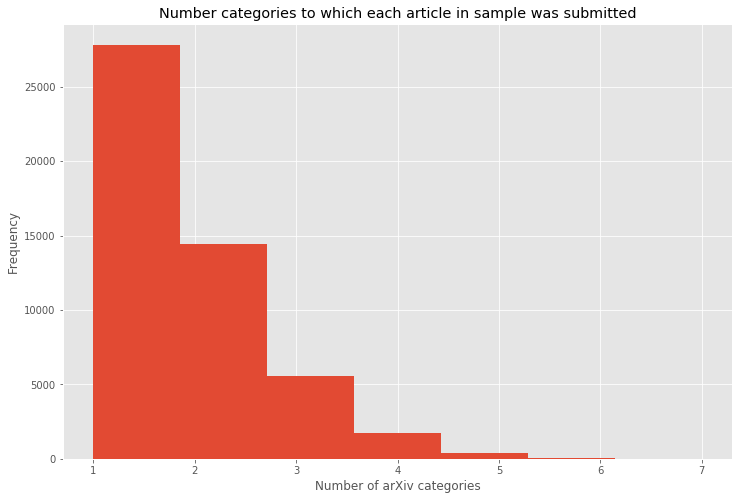

In [9]:
_ = plt.figure(figsize=(12,8))
_ = df.terms_len.plot(kind='hist', bins=7)
_ = plt.xlabel('Number of arXiv categories')
_ = plt.title('Number categories to which each article in sample was submitted')

One more category question: Which are the most popular categories?  How are submissions distributed?

In [10]:
cat_counts = pd.DataFrame.from_records([{
    'cosmology' : len(df.terms.loc[df.terms.str.contains('astro-ph.CO')]),
    'planetary' : len(df.terms.loc[df.terms.str.contains('astro-ph.EP')]),
    'galaxies' : len(df.terms.loc[df.terms.str.contains('astro-ph.GA')]),
    'high_energy' : len(df.terms.loc[df.terms.str.contains('astro-ph.HE')]),
    'instrument' : len(df.terms.loc[df.terms.str.contains('astro-ph.IM')]),
    'solar' : len(df.terms.loc[df.terms.str.contains('astro-ph.SR')])
}]).T.reset_index()

cat_counts.columns=['astro-ph category','article count']

cat_counts

,astro-ph category,article count
0,cosmology,11252
1,galaxies,15858
2,high_energy,12041
3,instrument,5976
4,planetary,6170
5,solar,12107


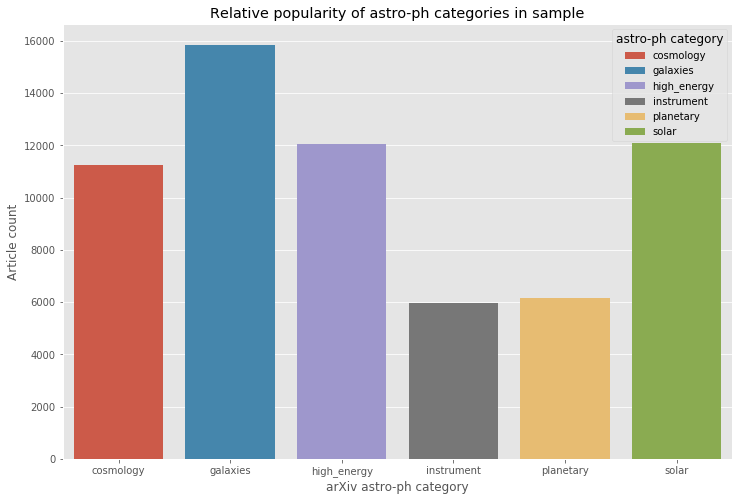

In [11]:
#cat_counts = cat_counts.sort_values(by='article count', ascending=False)

_ = plt.figure(figsize=(12,8))
_ = sns.barplot(x='astro-ph category', y='article count', hue='astro-ph category', data=cat_counts, dodge=False)
_ = plt.xlabel('arXiv astro-ph category')
_ = plt.ylabel('Article count')
_ = plt.title('Relative popularity of astro-ph categories in sample')

### Now on to the abstract lengths.  How many sentences are in abstracts?

In [12]:
df['sentences'] = [(entry.count('. ') + 1) for entry in df.abstract]
df.sentences.describe()

count    49973.000000
mean         7.750185
std          2.805857
min          1.000000
25%          6.000000
50%          8.000000
75%         10.000000
max         31.000000
Name: sentences, dtype: float64

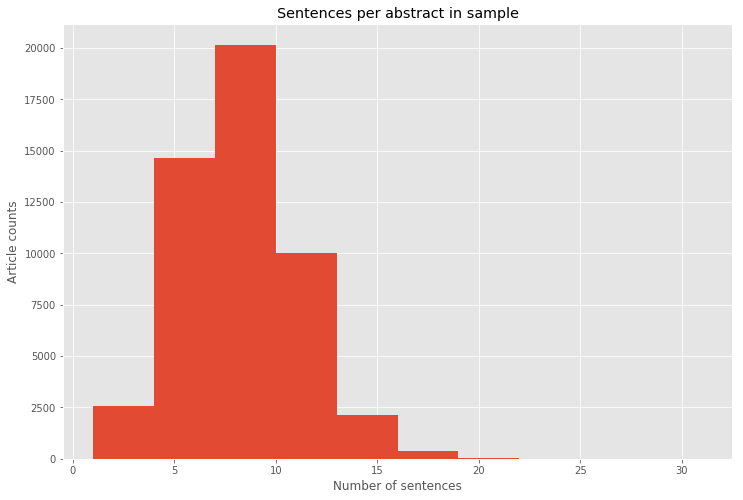

In [13]:
_ = plt.figure(figsize=(12,8))
_ = df.sentences.plot(kind='hist')
_ = plt.xlabel('Number of sentences')
_ = plt.ylabel('Article counts')
_ = plt.title('Sentences per abstract in sample')

### And now, the statistics on the entire sample:

In [14]:
df.describe(include='all')

,abstract,authors,comment,main_author,publish_date,term,terms,title,update_date,url,text,sentences,terms_len
count,49973,49973,49973,49973,49973,49973,49973,49973,49973,49973,49973,49973.000000,49973.000000
unique,49973,45911,36808,26132,47676,83,2223,49942,48992,49973,49971,NaN,NaN
top,We present results based on a well sampled opt...,Shahar Hod,No comment found,Abraham Loeb,2017-12-11 19:00:13+00:00,astro-ph.GA,astro-ph.GA,Fast Radio Bursts,2018-01-18 19:00:00+00:00,http://arxiv.org/abs/1607.00874v2,evidence local single source cosmic ray amass ...,NaN,NaN
freq,1,43,3159,106,8,12027,8438,3,6,1,2,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.750185,1.650731
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.805857,0.876737
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,2.000000


In [15]:
min(df.update_date)

'2016-03-22 19:33:56+00:00'

# Anything after this block is created using data that isn't explored in the rest of the project.

The full dataset is too much for my computer to parse, but I was curious about how the submissions might have changed over time.  Here I'll be looking at some year-by-year comparisons for category popularity and sentence length.

In [16]:
file_137k = os.path.join('..','data','astro_eda_only.csv')

file_137k

'..\\data\\astro_eda_only.csv'

In [17]:
# Read in the entire file, create a column for the year information, and remove data before 2015 and the partial 2019
df_137k = pd.read_csv(file_137k, index_col=0)
df_137k['year'] = [year[:4] for year in df_137k.update_date]
df_137k = df_137k.loc[('2018' >= df_137k.year) & (df_137k.year >= '2015')]
df_137k.head()

,abstract,authors,comment,main_author,publish_date,term,terms,title,update_date,url,text,year
7136,We study the chaotic-like behavior of cosmolog...,"Shy Genel, Greg L. Bryan, Volker Springel, Lar...",Key figures: 10 & 11. Accepted for publication...,Mark Vogelsberger,2018-07-18 18:00:08+00:00,astro-ph.GA,astro-ph.GA|astro-ph.IM,A Quantification of the Butterfly Effect in Co...,2018-12-31 23:27:27+00:00,http://arxiv.org/abs/1807.07084v2,We study the chaotic-like behavior of cosmolog...,2018
7137,Powerful radio sources and quasars emit relati...,"Daniel A Schwartz, Aneta Siemiginowska, Diana ...","6 pages, 4 figures. In proceedings of the IWAR...",Doug Gobeille,2018-12-31 22:25:25+00:00,astro-ph.HE,astro-ph.HE,Relativistic X-ray jets at high redshift,2018-12-31 22:25:25+00:00,http://arxiv.org/abs/1901.00057v1,Powerful radio sources and quasars emit relati...,2018
7138,We report the discovery of two Li-rich giant s...,"A. Mucciarelli, L. Monaco, P. Bonifacio, M. Sa...",Accepted for publication in A&A,S. Villanova,2018-12-31 21:06:38+00:00,astro-ph.SR,astro-ph.SR,The discovery of a Li-Na-rich giant star in Om...,2018-12-31 21:06:38+00:00,http://arxiv.org/abs/1901.00048v1,We report the discovery of two Li-rich giant s...,2018
7139,We report the first detection of hard (>10 keV...,"Thomas Nelson, Koji Mukai, Kwan-Lok Li, Indrek...",Accepted for publication in the Astrophysical ...,Paul Luckas,2018-12-31 19:46:40+00:00,astro-ph.HE,astro-ph.HE,NuSTAR Detection of X-rays Concurrent with Gam...,2018-12-31 19:46:40+00:00,http://arxiv.org/abs/1901.00030v1,We report the first detection of hard (>10 keV...,2018
7140,The All-Sky Automated Survey for Supernovae (A...,"T. Jayasinghe, K. Z. Stanek, C. S. Kochanek, B...","13 pages, 12 figures. Submitted to MNRAS",D. Will,2018-12-31 19:00:02+00:00,astro-ph.SR,astro-ph.SR,The ASAS-SN Catalog of Variable Stars III: Var...,2018-12-31 19:00:02+00:00,http://arxiv.org/abs/1901.00009v1,The All-Sky Automated Survey for Supernovae (A...,2018


In [18]:
# Create the terms_len column in order to plot the number of categories to which each article is submitted
df_137k['terms_len'] = [len(x.split('|')) for x in df_137k.terms]
df_137k.terms_len.describe()

count    59605.000000
mean         1.653066
std          0.875368
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: terms_len, dtype: float64

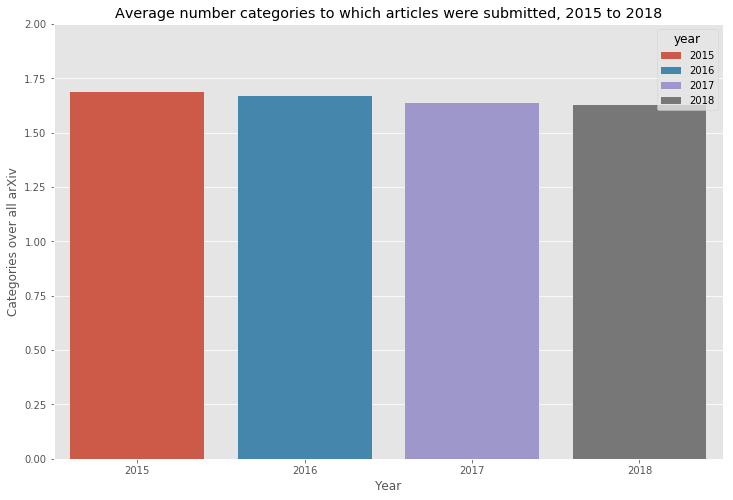

In [19]:
_ = plt.figure(figsize=(12,8))
_ = sns.barplot(x='year', y='terms_len', hue='year', data=df_137k, dodge=False, ci=None)
_ = plt.xlabel('Year')
_ = plt.ylabel('Categories over all arXiv')
_ = plt.title('Average number categories to which articles were submitted, 2015 to 2018')
_ = plt.ylim(0,2)

In [20]:
# Divide out the categories and the years of interest to plot changes
cat_counts = pd.DataFrame.from_records([{
    'cosmology_2015' : len(df_137k.terms.loc[(df_137k.terms.str.contains('astro-ph.CO')) & (df_137k.year=='2015')]),
    'cosmology_2018' : len(df_137k.terms.loc[(df_137k.terms.str.contains('astro-ph.CO')) & (df_137k.year=='2018')]),
    'planetary_2015' : len(df_137k.terms.loc[(df_137k.terms.str.contains('astro-ph.EP')) & (df_137k.year=='2015')]),
    'planetary_2018' : len(df_137k.terms.loc[(df_137k.terms.str.contains('astro-ph.EP')) & (df_137k.year=='2018')]),
    'galaxies_2015' : len(df_137k.terms.loc[(df_137k.terms.str.contains('astro-ph.GA')) & (df_137k.year=='2015')]),
    'galaxies_2018' : len(df_137k.terms.loc[(df_137k.terms.str.contains('astro-ph.GA')) & (df_137k.year=='2018')]),
    'high_energy_2015' : len(df_137k.terms.loc[(df_137k.terms.str.contains('astro-ph.HE')) & (df_137k.year=='2015')]),
    'high_energy_2018' : len(df_137k.terms.loc[(df_137k.terms.str.contains('astro-ph.HE')) & (df_137k.year=='2018')]),
    'instrument_2015' : len(df_137k.terms.loc[(df_137k.terms.str.contains('astro-ph.IM')) & (df_137k.year=='2015')]),
    'instrument_2018' : len(df_137k.terms.loc[(df_137k.terms.str.contains('astro-ph.IM')) & (df_137k.year=='2018')]),
    'solar_2015' : len(df_137k.terms.loc[(df_137k.terms.str.contains('astro-ph.SR')) & (df_137k.year=='2015')]),
    'solar_2018' : len(df_137k.terms.loc[(df_137k.terms.str.contains('astro-ph.SR')) & (df_137k.year=='2018')])
}]).T.reset_index()

cat_counts.columns=['astro-ph category','article count']

cat_counts['year'] = [year[-4:] for year in cat_counts['astro-ph category']]
cat_counts['astro-ph category'] = [cat[:-5] for cat in cat_counts['astro-ph category']]
cat_counts

,astro-ph category,article count,year
0,cosmology,3756,2015
1,cosmology,3422,2018
2,galaxies,3538,2015
3,galaxies,5180,2018
4,high_energy,3538,2015
5,high_energy,3660,2018
6,instrument,1392,2015
7,instrument,2055,2018
8,planetary,1598,2015
9,planetary,1971,2018


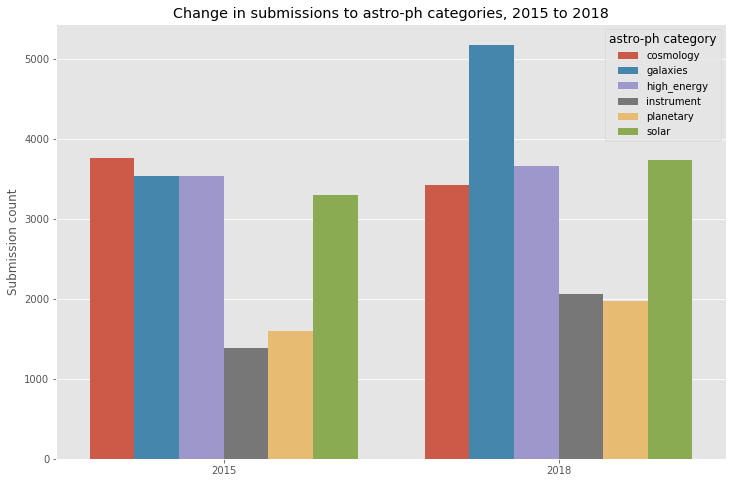

In [21]:
_ = plt.figure(figsize=(12,8))
_ = sns.barplot(x='year', y='article count', hue='astro-ph category', data=cat_counts)
_ = plt.xlabel('')
_ = plt.ylabel('Submission count')
_ = plt.title('Change in submissions to astro-ph categories, 2015 to 2018')

In [22]:
sum_2015 = sum(cat_counts['article count'].loc[cat_counts.year=='2015'])
sum_2018 = sum(cat_counts['article count'].loc[cat_counts.year=='2018'])

sum_2015, sum_2018

(17120, 20027)

In [23]:
# Add a column for number of sentences to track averages
df_137k['sentences'] = [(entry.count('. ') + 1) for entry in df_137k.abstract]
df_137k.sentences.describe()

count    59605.000000
mean         7.735811
std          2.842063
min          1.000000
25%          6.000000
50%          8.000000
75%         10.000000
max         31.000000
Name: sentences, dtype: float64

In [24]:
# Create a groupby to plot sentence averages
sent_count = df_137k[['sentences', 'year']].groupby('year').mean().reset_index()

In [25]:
sent_count

,year,sentences
0,2015,7.620370
1,2016,7.778595
2,2017,7.769159
3,2018,7.760435


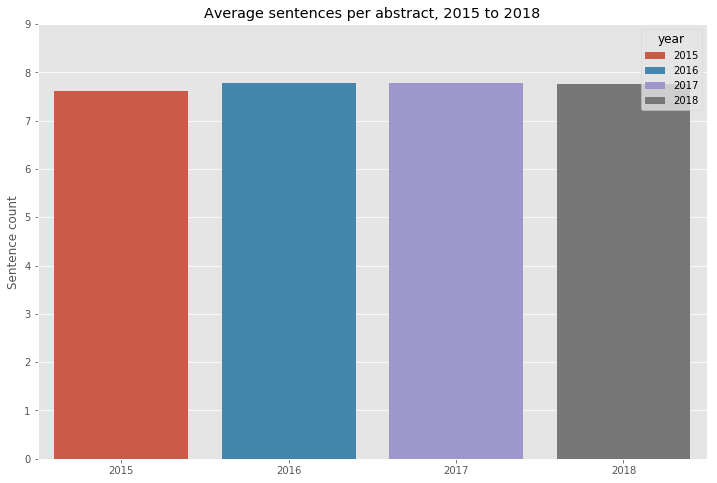

In [26]:
_ = plt.figure(figsize=(12,8))
_ = sns.barplot(x='year', y='sentences', hue='year', data=sent_count, dodge=False)
_ = plt.xlabel('')
_ = plt.ylabel('Sentence count')
_ = plt.title('Average sentences per abstract, 2015 to 2018')
_ = plt.ylim(0, 9)